# <font color='slate'>**Exploring British Airways: Web Scraping and Analytical Insights**</font>

The project involves scraping data from the website "airlinequality," specifically extracting information such as Route, Seat_type, Date_flown, recommended status, aircraft details, and ratings provided by passengers. Additionally, weight distributions for service ratings have been calculated, likely to understand the relative importance of each aspect in passenger satisfaction.

Data cleaning was performed to ensure the accuracy and reliability of the dataset.

One of the key aspects of the project was the creation of various visualizations and informative insights derived from the retrieved data. Graphs and charts were utilized to present findings effectively, allowing for a deeper understanding of passenger experiences and preferences.

Throughout the project, code comments and inferences were provided to facilitate comprehension and interpretation of the analysis conducted.

***NOTE:***
*   Country denotes the destination country of the flight's arrival.
*   The project involves numerous bar plots, catering to our dataset's mixed categorical and numerical nature. We employ various groupings to explore passenger ratings across different dimensions.

In [62]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [118]:
# This code scrapes airline reviews for British Airways from multiple pages on the website airlinequality.com.
# It iterates through the pages, extracts review values, and appends those values to the 'Route' list if they contain the word 'to'.

# Initialize an empty list to store route information
Route=[]
for i in range(1,100):
    url=f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/"

    # Send a GET request to the URL and extract the HTML content
    doc=requests.get(url).text
    result=BeautifulSoup(doc,'lxml')
    for i in range(0,len(result.find_all('td',class_='review-value'))):

        # Extract the review value as a string
        rv=result.find_all('td',class_='review-value')[i].string

        # Check if the review value contains the word 'to'
        if (re.findall('to',rv)==['to']):

            # If 'to' is found, extract the route information and append it to the Route list
            Route1=(result.find_all('td',class_='review-value')[i].string)
            Route.append(Route1)

In [119]:
# Scrapes seat typese.g., Economy Class, Business Class, etc.) from multiple pages of airline reviews for British Airways on airlinequality.com
Seat_Type=[]
for i in range(1,100):
    url=f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/"
    doc=requests.get(url).text
    result=BeautifulSoup(doc,'lxml')
    for i in range(0,len(result.find_all('td',class_='review-value'))):
        rv=result.find_all('td',class_='review-value')[i].string
        if (re.findall('Class$',rv)==['Class'])|(re.findall('Premium Economy',rv)==['Premium Economy']):
            Seat_Type1=(result.find_all('td',class_='review-value')[i].string)
            Seat_Type.append(Seat_Type1)

In [120]:
# Extracts dates flown from multiple pages of airline reviews for British Airways on airlinequality.com.
Date_Flown=[]
for i in range(1,100):
    url=f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/"
    doc=requests.get(url).text
    result=BeautifulSoup(doc,'lxml')
    for i in range(0,len(result.find_all('td',class_='review-value'))):
        rv=result.find_all('td',class_='review-value')[i].string
        if (re.findall('^January',rv)==['January'])|(re.findall('^Febuary',rv)==['Febuary'])|(re.findall('^March',rv)==['March'])|(re.findall('^April',rv)==['April'])|(re.findall('^May',rv)==['May'])|(re.findall('^June',rv)==['June'])|(re.findall('^July',rv)==['July'])|(re.findall('^August',rv)==['August'])|(re.findall('^September',rv)==['September'])|(re.findall('^October',rv)==['October'])|(re.findall('^November',rv)==['November'])|(re.findall('^December',rv)==['December']):
            Date_Flown1=(result.find_all('td',class_='review-value')[i].string)
            Date_Flown.append(Date_Flown1)

In [121]:
# Gathers recommendations (yes or no) from multiple pages of airline reviews for British Airways on airlinequality.com.
Recommended=[]
for i in range(1,100):
    url=f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/"
    doc=requests.get(url).text
    result=BeautifulSoup(doc,'lxml')
    for i in range(0,len(result.find_all('td',class_='review-value'))):
        rv=result.find_all('td',class_='review-value')[i].string
        if (rv=='yes')|(rv=='no'):
            Recommended1=(result.find_all('td',class_='review-value')[i].string)
            Recommended.append(Recommended1)

In [122]:
# Collects aircraft information from multiple pages of airline reviews for British Airways on airlinequality.com.
aircraft=[]
for i in range(1,100):
    url=f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/"
    doc=requests.get(url).text
    result=BeautifulSoup(doc,'lxml')
    for i in range(0,len(result.find_all('td',class_='review-value'))):
        rv=result.find_all('td',class_='review-value')[i].string
        if (re.findall('^A3',rv)==['A3'])|(re.findall('^Boeing',rv)==['Boeing']):
            #print(result.find_all('td',class_='review-value')[i].string)
            air=(result.find_all('td',class_='review-value')[i].string)
            aircraft.append(air)

In [220]:
# Extracts review information including date, reviewer name, country, comment, and type of traveler from multiple pages of airline reviews for British Airways on airlinequality.com.

rating = []

for i in range(1, 100):
    url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/"
    doc = requests.get(url).text
    result = BeautifulSoup(doc, 'lxml')
    for j in range(0, len(result.div.find_all('time', itemprop="datePublished"))):
        date = result.div.find_all('time', itemprop="datePublished")[j].string
        name = result.div.find_all('span', itemprop="name")[j].string
        country = result.div.find_all('h3')[j].get_text(strip=True)
        comment = result.div.find_all('h2')[j + 1].string

        rv = result.find_all('td', class_='review-value')[j].string
        Type_Of_Traveller = None  # Default value
        if (re.findall('Leisure$', rv) == ['Leisure']) or (re.findall('Business', rv) == ['Business']):
            Type_Of_Traveller = result.find_all('td', class_='review-value')[j].string

        rating.append([date, name, country, comment, Type_Of_Traveller])

In [221]:
# Define weight distributions for ratings
Cabin_Staff_Service = [0.2, 0.2, 0.2, 0.2, 0.2]
Food_and_Beverages = [0.3, 0.3, 0.1, 0.1, 0.2]
Ground_Service = [0.2, 0.3, 0.2, 0.1, 0.2]
Inflight_Entertainment = [0.1, 0.2, 0.3, 0.3, 0.1]
Seat_comfort = [0.2, 0.1, 0.4, 0.2, 0.1]
Value_For_Money = [0.1, 0.3, 0.2, 0.1, 0.3]
Wifi_and_Connectivity = [0.3, 0.1, 0.1, 0.2, 0.3]

# Define star ratings
star = [1, 2, 3, 4, 5]

# Generate random ratings based on defined distributions
Cabin_Staff_Service_rating = np.random.choice(star, len(rating), p=Cabin_Staff_Service)
Food_and_Beverages_rating = np.random.choice(star, len(rating), p=Food_and_Beverages)
Ground_Service_rating = np.random.choice(star, len(rating), p=Ground_Service)
Inflight_Entertainment_rating = np.random.choice(star, len(rating), p=Inflight_Entertainment)
Seat_comfort_rating = np.random.choice(star, len(rating), p=Seat_comfort)
Value_For_Money_rating = np.random.choice(star, len(rating), p=Value_For_Money)
Wifi_and_Connectivity_rating = np.random.choice(star, len(rating), p=Wifi_and_Connectivity)

In [222]:
def rand(x):
    return np.random.choice(a=x,size=len(rating),p=(np.ones(len(x))/len(x)))

In [223]:
British_Airway=pd.DataFrame(rating,columns=['date','name','country','comment','Type_Of_Traveller'])
#British_Airway['Route']=rand(Route)
British_Airway['Seat_Type']=rand(Seat_Type)
#British_Airway['Date_Flown']=rand(Date_Flown)
British_Airway['Recommended']=rand(Recommended)
British_Airway['Cabin_Staff_Service_rating']=Cabin_Staff_Service_rating
British_Airway['Food_and_Beverages_rating']=Food_and_Beverages_rating
British_Airway['Ground_Service_rating']=Ground_Service_rating
Inflight_Entertainment_values = np.random.randint(1, 6, size=len(British_Airway))

# Assign the generated values to the DataFrame
British_Airway['Inflight_Entertainment'] = Inflight_Entertainment_values
British_Airway['Seat_comfort_rating']=Seat_comfort_rating
British_Airway['Value_For_Money_rating']=Value_For_Money_rating
British_Airway['Wifi_and_Connectivity_rating']=Wifi_and_Connectivity_rating

In [224]:
British_Airway.head()

,date,name,country,comment,Type_Of_Traveller,Seat_Type,Recommended,Cabin_Staff_Service_rating,Food_and_Beverages_rating,Ground_Service_rating,Inflight_Entertainment,Seat_comfort_rating,Value_For_Money_rating,Wifi_and_Connectivity_rating
0,21st March 2024,Michael Powell,4 reviewsMichael Powell(United Kingdom)21st Ma...,"""stick to their cabin bag size limit""",None,Economy Class,yes,5,5,2,4,1,2,5
1,21st March 2024,N Wardan,N Wardan(Canada)21st March 2024,"""crew were attentive, friendly""",Solo Leisure,Economy Class,no,2,1,2,1,4,1,1
2,19th March 2024,Solomon Pachtinger,Solomon Pachtinger(United Kingdom)19th March 2024,"""Utterly outrageous""",None,Economy Class,no,2,2,1,3,4,1,5
3,19th March 2024,Paul Roberts,Paul Roberts(Singapore)19th March 2024,"""They have a long way to go""",None,Business Class,yes,5,2,3,4,3,2,5
4,14th March 2024,E Carmere,42 reviewsE Carmere(Belgium)14th March 2024,"""FA's were friendly""",None,Economy Class,no,1,2,1,1,5,4,5


## **DATA CLEANING**
The code efficiently cleans and prepares British Airways data by extracting country names, removing unwanted characters, and ensuring data consistency, followed by a comprehensive summary of missing values and descriptive statistics, facilitating streamlined analysis.

In [225]:
# Extract country names from parentheses in the 'country' column and update the column with the extracted names.
British_Airway['country'] = British_Airway['country'].str.extract(r'\((.*?)\)')

In [226]:
# Remove double quotes from the 'comment' column
British_Airway['comment']=British_Airway['comment'].str.replace('"','')

In [227]:
# Convert the 'date' column to string data type
British_Airway['date']=British_Airway['date'].astype('str')

In [228]:
British_Airway.head()

,date,name,country,comment,Type_Of_Traveller,Seat_Type,Recommended,Cabin_Staff_Service_rating,Food_and_Beverages_rating,Ground_Service_rating,Inflight_Entertainment,Seat_comfort_rating,Value_For_Money_rating,Wifi_and_Connectivity_rating
0,21st March 2024,Michael Powell,United Kingdom,stick to their cabin bag size limit,None,Economy Class,yes,5,5,2,4,1,2,5
1,21st March 2024,N Wardan,Canada,"crew were attentive, friendly",Solo Leisure,Economy Class,no,2,1,2,1,4,1,1
2,19th March 2024,Solomon Pachtinger,United Kingdom,Utterly outrageous,None,Economy Class,no,2,2,1,3,4,1,5
3,19th March 2024,Paul Roberts,Singapore,They have a long way to go,None,Business Class,yes,5,2,3,4,3,2,5
4,14th March 2024,E Carmere,Belgium,FA's were friendly,None,Economy Class,no,1,2,1,1,5,4,5


In [229]:
print("\nMissing values:")
print(British_Airway.isnull().sum())


Missing values:
date                              0
name                              0
country                           0
comment                           0
Type_Of_Traveller               724
Seat_Type                         0
Recommended                       0
Cabin_Staff_Service_rating        0
Food_and_Beverages_rating         0
Ground_Service_rating             0
Inflight_Entertainment            0
Seat_comfort_rating               0
Value_For_Money_rating            0
Wifi_and_Connectivity_rating      0
dtype: int64


In [230]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(British_Airway.describe())


Summary statistics for numerical columns:
       Cabin_Staff_Service_rating  Food_and_Beverages_rating  \
count                  990.000000                 990.000000   
mean                     3.040404                   2.646465   
std                      1.464920                   1.509077   
min                      1.000000                   1.000000   
25%                      2.000000                   1.000000   
50%                      3.000000                   2.000000   
75%                      4.000000                   4.000000   
max                      5.000000                   5.000000   

       Ground_Service_rating  Inflight_Entertainment  Seat_comfort_rating  \
count             990.000000              990.000000           990.000000   
mean                2.776768                2.950505             2.837374   
std                 1.429031                1.410840             1.196057   
min                 1.000000                1.000000             1.00000

In [231]:
# Summary statistics for categorical columns
print("\nSummary statistics for categorical columns:")
print(British_Airway.describe(include=['object']))


Summary statistics for categorical columns:
                     date     name         country  \
count                 990      990             990   
unique                702      855              55   
top     8th December 2019  E Smyth  United Kingdom   
freq                    7       20             564   

                                comment Type_Of_Traveller      Seat_Type  \
count                               990               266            990   
unique                              978                 5              4   
top     British Airways customer review      Solo Leisure  Economy Class   
freq                                  3                72            543   

       Recommended  
count          990  
unique           2  
top             no  
freq           691  


In [270]:
#Exporting British airways data to csv
British_Airway.to_csv('British_Airway.csv',index=False)

## **DATA ANALYSIS AND VISUAIZATION**

Utilizing Seaborn's barplot functionality, clear insights into customer ratings for various aspects of airline services are drawn.

In [233]:
rating_columns = ['Cabin_Staff_Service_rating', 'Food_and_Beverages_rating',
                  'Ground_Service_rating', 'Inflight_Entertainment',
                  'Seat_comfort_rating', 'Value_For_Money_rating',
                  'Wifi_and_Connectivity_rating']
British_Airway[rating_columns] = British_Airway[rating_columns].apply(pd.to_numeric, errors='coerce')

# Calculating overall rating
British_Airway['Overall_Rating'] = British_Airway[rating_columns].mean(axis=1)

# Finding the best flight
best_flight = British_Airway.loc[ British_Airway['Overall_Rating'].idxmax() ]

# Finding the worst flight
worst_flight = British_Airway.loc[ British_Airway['Overall_Rating'].idxmin() ]

print("Best Flight Details:")
print(best_flight)

print("\nWorst Flight Details:")
print(worst_flight)

Best Flight Details:
date                                         2nd April 2020
name                                                J Meers
country                                      United Kingdom
comment                         lies and lack of informatio
Type_Of_Traveller                                      None
Seat_Type                                    Business Class
Recommended                                              no
Cabin_Staff_Service_rating                                5
Food_and_Beverages_rating                                 5
Ground_Service_rating                                     5
Inflight_Entertainment                                    5
Seat_comfort_rating                                       4
Value_For_Money_rating                                    5
Wifi_and_Connectivity_rating                              4
Overall_Rating                                     4.714286
Name: 661, dtype: object

Worst Flight Details:
date                           

In [234]:
# Finding the service with the top rating
avg_ratings = British_Airway.iloc[:, 7:].mean()
top_service = avg_ratings.idxmax()
top_rating = avg_ratings.max()

# Finding the service with the lowest rating
low_service = avg_ratings.idxmin()
low_rating = avg_ratings.min()

print("Service with the top rating:", top_service)
print("Top rating:", top_rating)
print("Service with the lowest rating:", low_service)
print("Lowest rating:", low_rating)

Service with the top rating: Value_For_Money_rating
Top rating: 3.202020202020202
Service with the lowest rating: Food_and_Beverages_rating
Lowest rating: 2.6464646464646466


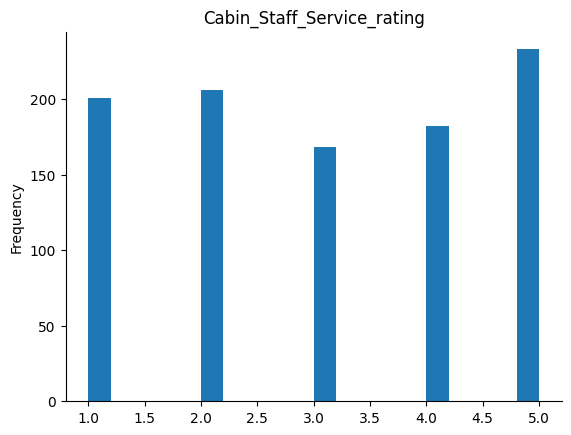

In [235]:
#Cabin_Staff_Service_rating

from matplotlib import pyplot as plt
British_Airway['Cabin_Staff_Service_rating'].plot(kind='hist', bins=20, title='Cabin_Staff_Service_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

From above graph we infer that:


*  The most common ratings are below 2.0 and 5.0. These peaks indicate that passengers either had a neutral experience (below 2.0) or were quite satisfied (above 4.5) with the cabin staff service.
*   The lower ratings (below 3.0) highlight areas where the cabin staff service could be enhanced.



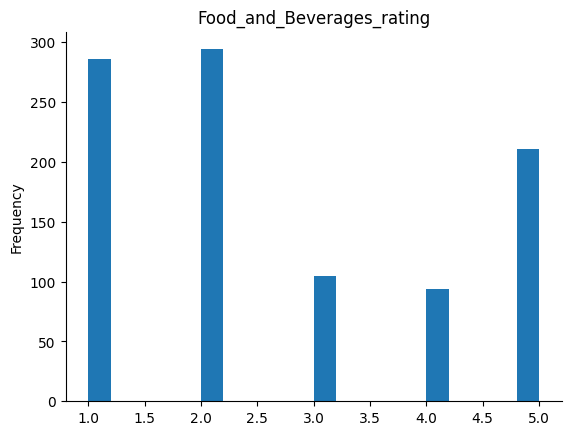

In [236]:
# Food_and_Beverages_rating

from matplotlib import pyplot as plt
British_Airway['Food_and_Beverages_rating'].plot(kind='hist', bins=20, title='Food_and_Beverages_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

From the above plot we infer that there were many no of passagers that rated low for the food and beverages(1.0-2.0). Only around 200 passangers rated 5.0 for Food and Beverages.

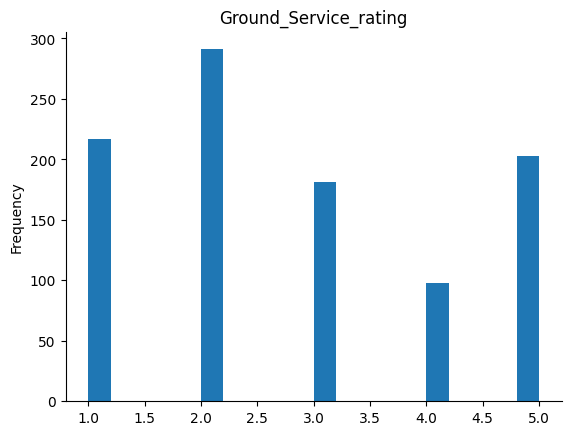

In [237]:
#Ground_Service_rating

from matplotlib import pyplot as plt
British_Airway['Ground_Service_rating'].plot(kind='hist', bins=20, title='Ground_Service_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

From the above plot we infer:

*  Majority of passangers rated low to satisfactory for ground service(maintainence,cleaning,baggage handaling,etc)
*  Only some passengers rated the service very positively.


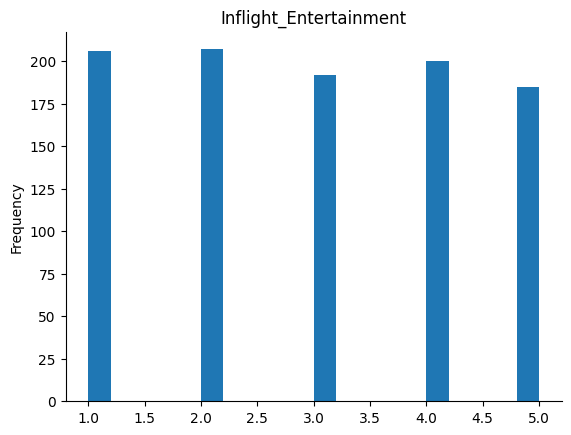

In [266]:
#Inflight_Entertainment

from matplotlib import pyplot as plt
British_Airway['Inflight_Entertainment'].plot(kind='hist', bins=20, title='Inflight_Entertainment')
plt.gca().spines[['top', 'right',]].set_visible(False)

From above plot we infer that:

*  Ratings below 3.0 (including 1.0 and 2.0) dominate the graph. This indicates that improvements are needed in the entertainment offerings.

*   Ratings around 5 follow closely, suggesting that passengers were generally satisfied.


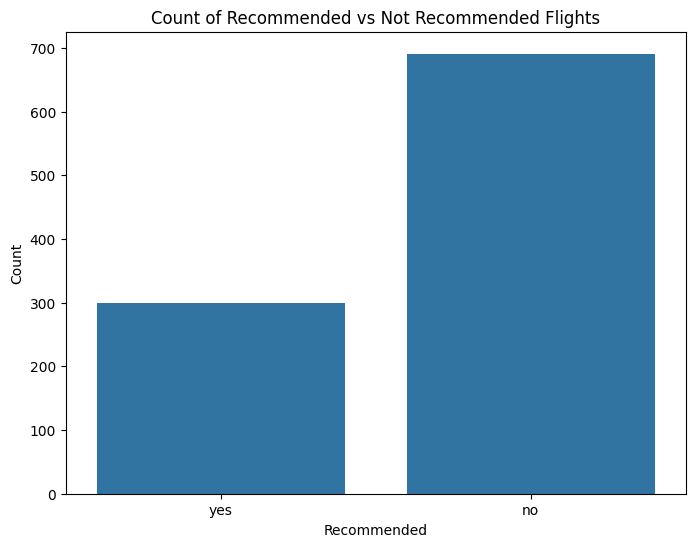

In [239]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Recommended', data=British_Airway)
plt.title('Count of Recommended vs Not Recommended Flights')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.show()


*   British Airways has a higher number of not recommended flights compared to recommended ones.
*   Passengers may have encountered issues or concerns with a significant portion of the flights.
*   Improving the quality of the not recommended flights could enhance overall passenger satisfaction.


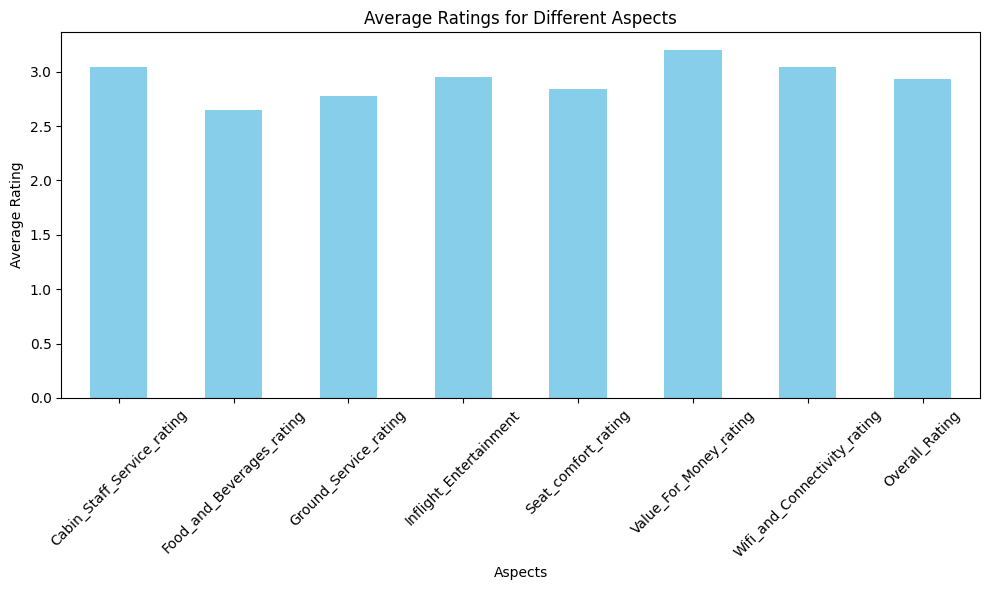

In [240]:
# Plot Average Ratings for Different Aspects
plt.figure(figsize=(10, 6))
avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings for Different Aspects')
plt.xlabel('Aspects')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

All bars have similar heights, centered around the 3.0 mark, indicating moderate ratings for all the aspects.

In [241]:
# Group the 'British_Airway' DataFrame by 'country' and calculate the mean ratings for each rating category.
groupby_country=British_Airway.groupby('country')[['Cabin_Staff_Service_rating',
       'Food_and_Beverages_rating', 'Ground_Service_rating',
       'Inflight_Entertainment', 'Seat_comfort_rating',
       'Value_For_Money_rating', 'Wifi_and_Connectivity_rating']].mean()
groupby_country

,Cabin_Staff_Service_rating,Food_and_Beverages_rating,Ground_Service_rating,Inflight_Entertainment,Seat_comfort_rating,Value_For_Money_rating,Wifi_and_Connectivity_rating
country,,,,,,,
Argentina,3.333333,3.333333,4.000000,4.000000,2.333333,3.666667,2.333333
Australia,2.864865,2.540541,2.702703,2.675676,2.972973,3.675676,2.891892
Austria,4.000000,2.000000,1.000000,4.000000,1.000000,5.000000,4.000000
Belgium,2.666667,1.833333,3.666667,2.500000,2.833333,3.000000,3.500000
Bermuda,5.000000,5.000000,3.000000,2.000000,3.000000,5.000000,5.000000
Botswana,5.000000,2.000000,2.000000,2.000000,3.000000,5.000000,3.000000
Brazil,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000,4.000000
Bulgaria,5.000000,2.000000,3.000000,1.000000,3.000000,2.000000,5.000000
Canada,2.942857,2.228571,2.285714,2.742857,2.828571,2.971429,3.114286


In [242]:
# Define a function to plot average ratings by country using seaborn's barplot

def rating_by_country(v,c,title):
    plt.figure(figsize=(10, 5))
    colors = sns.color_palette("husl", len(v.index))
    sns.barplot(x=v.index, y=v, palette=colors)
    plt.xticks(rotation=90)
    plt.title(f'{title}')
    plt.show()
    return plt

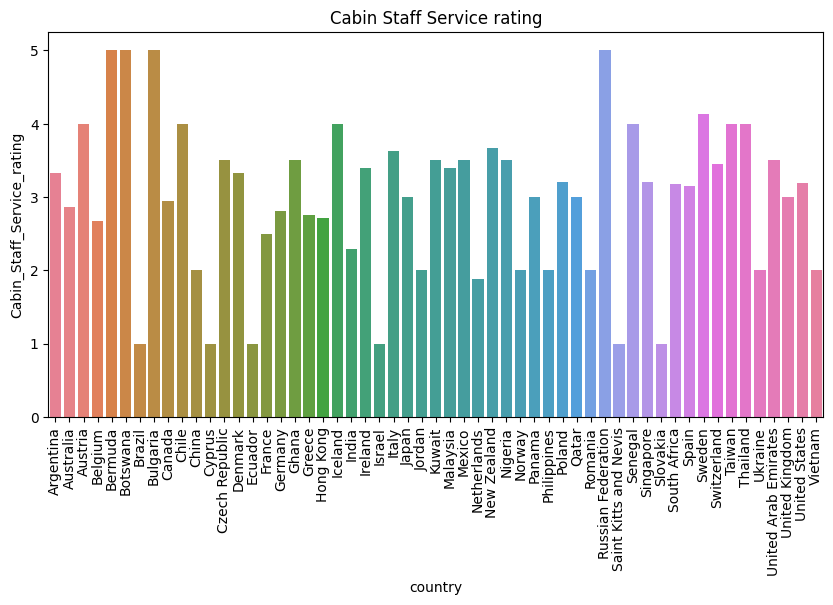

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [243]:
# Displays a bar plot of average cabin staff service ratings by country
display(rating_by_country(groupby_country['Cabin_Staff_Service_rating'],'Cabin_Staff_Service_rating','Cabin Staff Service rating'))


*   Countries like Belgium, Bulgaria, and Russian Federation have higher average ratings for cabin staff service.
*   In contrast, countries like Brazil, Israel and Ecuador have lower average ratings.



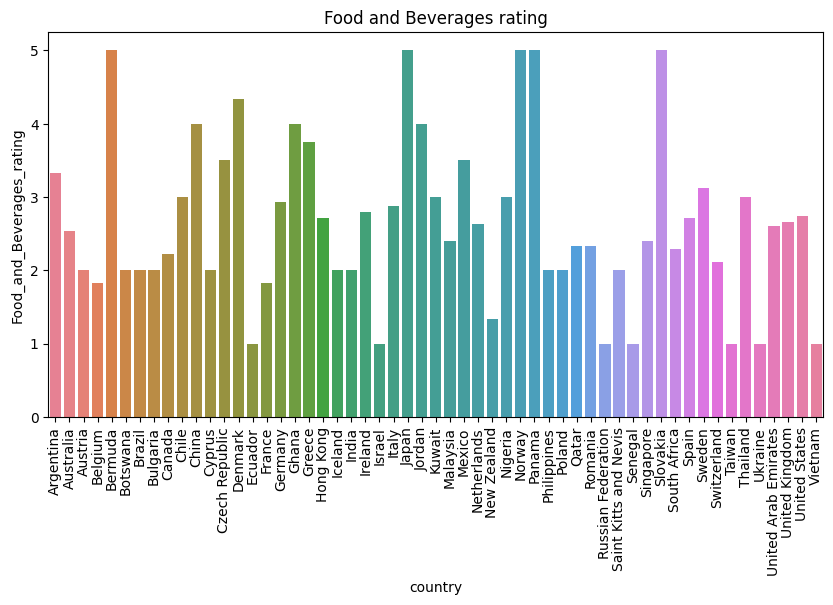

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [244]:
# Display a bar plot of average food and beverages rating by country
display(rating_by_country(groupby_country['Food_and_Beverages_rating'],'Food_and_Beverages_rating','Food and Beverages rating'))


*   Japan and Panama have 5.0 rating for food and beverage.
*   There are almost 9 countries like Taiwan, Israel, Ukraine have lowest rating(1.0).

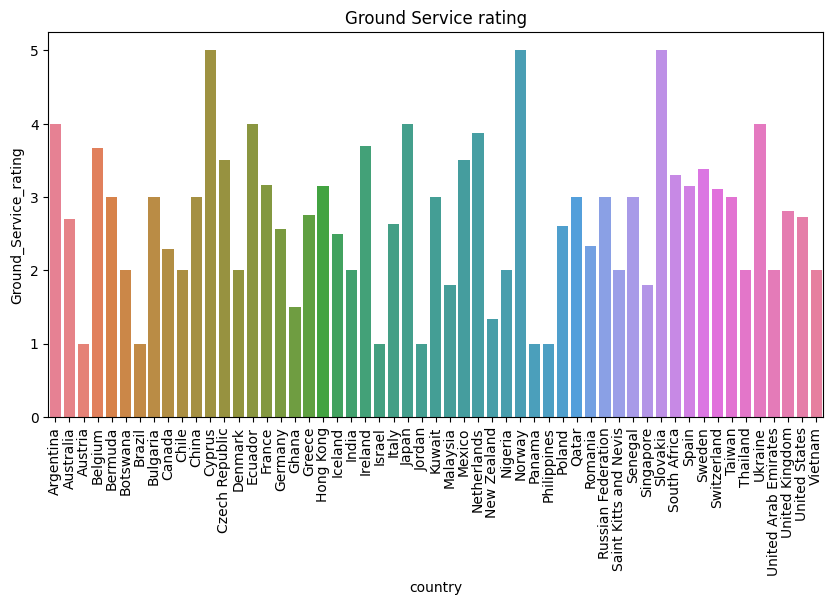

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [245]:
# Displays a bar plot of average ground service ratings by country
display(rating_by_country(groupby_country['Ground_Service_rating'],'Ground_Service_rating','Ground Service rating'))



*   Countries like Norway, Nigeria and Slovakia appear to have high average ground service ratings.

*   In contrast, countries like Jordan and the Austria have lower average ratings.



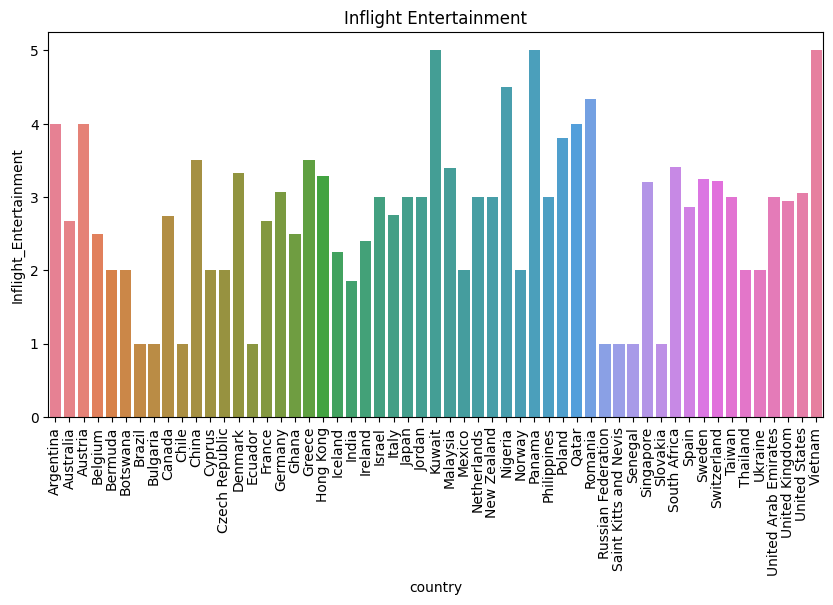

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [246]:
# Display a bar plot of average inflight_entertainment ratings by country
display(rating_by_country(groupby_country['Inflight_Entertainment'],'Inflight_Entertainment','Inflight Entertainment'))

*   Countries like Vietnam, Panama, and Kuwait have higher average ratings.
*   Countries like Chile and the Brazil have lower average ratings.



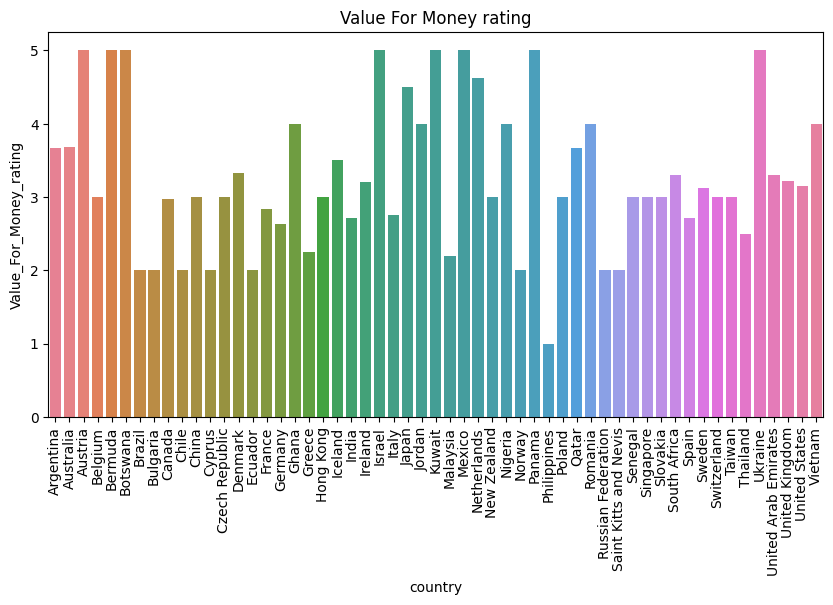

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [247]:
# Display a bar plot of average value for money ratings by country
display(rating_by_country(groupby_country['Value_For_Money_rating'],'Value_For_Money_rating','Value For Money rating'))

There are only few  low value for money ratings for countries like Philippines, Brazil and Chile.

In [248]:
# Group the 'British_Airway' DataFrame by 'Type_Of_Traveller' and calculate the sum of ratings for each rating category
British_Airway['Type_Of_Traveller'] = British_Airway['Type_Of_Traveller'].replace('Business', 'Business Class')
groupby_Type_Of_Traveller=British_Airway.groupby('Type_Of_Traveller')[['Cabin_Staff_Service_rating',
       'Food_and_Beverages_rating', 'Ground_Service_rating',
       'Inflight_Entertainment', 'Seat_comfort_rating',
       'Value_For_Money_rating', 'Wifi_and_Connectivity_rating']].sum()
groupby_Type_Of_Traveller

,Cabin_Staff_Service_rating,Food_and_Beverages_rating,Ground_Service_rating,Inflight_Entertainment,Seat_comfort_rating,Value_For_Money_rating,Wifi_and_Connectivity_rating
Type_Of_Traveller,,,,,,,
Business Class,318,257,292,287,300,333,314
Couple Leisure,184,159,194,177,165,191,188
Family Leisure,111,78,97,97,87,95,89
Solo Leisure,210,195,211,193,222,217,234


In [249]:
# Define a function to plot average ratings by type of traveller using seaborn's barplot
def rating_by_type_of_traveller(v,c,title):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=v.index,y=v,palette='Set3')
    #plt.xticks(rotation=90)
    plt.title(f'{title}')
    plt.show()
    return plt

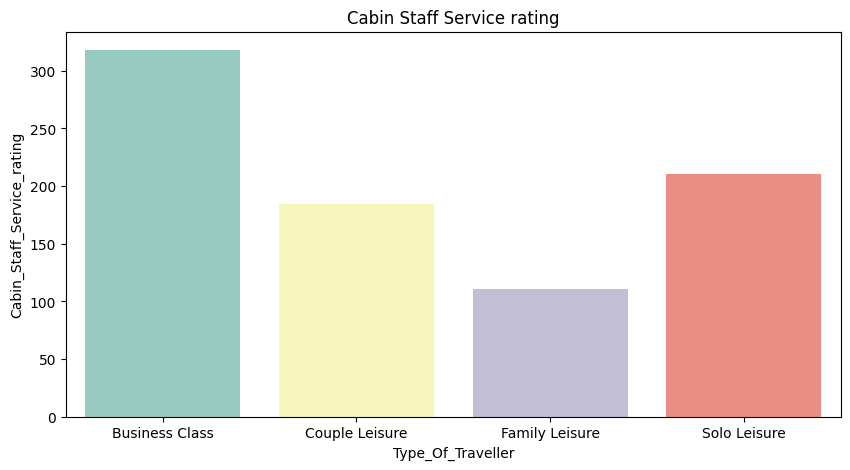

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [250]:
# Display a bar plot of total cabin staff service ratings by type of traveler
display(rating_by_type_of_traveller(groupby_Type_Of_Traveller['Cabin_Staff_Service_rating'],'Cabin_Staff_Service_rating','Cabin Staff Service rating'))

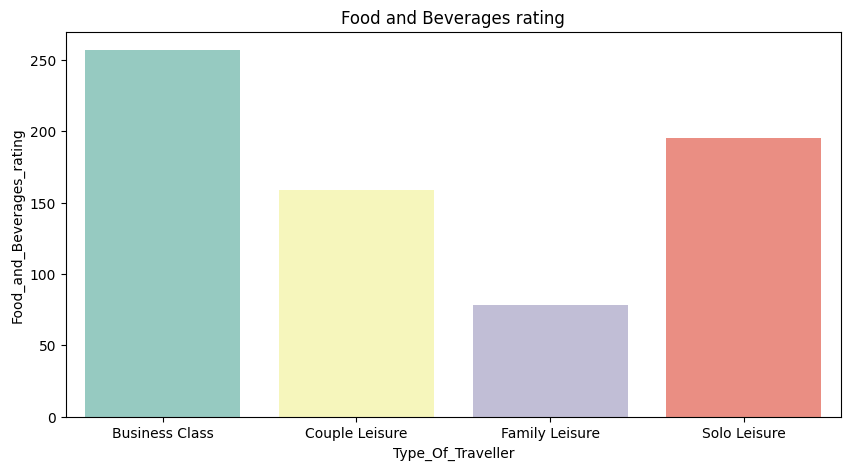

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [251]:
# Display a bar plot of total food and beverages ratings by type of traveler
display(rating_by_type_of_traveller(groupby_Type_Of_Traveller['Food_and_Beverages_rating'],'Food_and_Beverages_rating','Food and Beverages rating'))

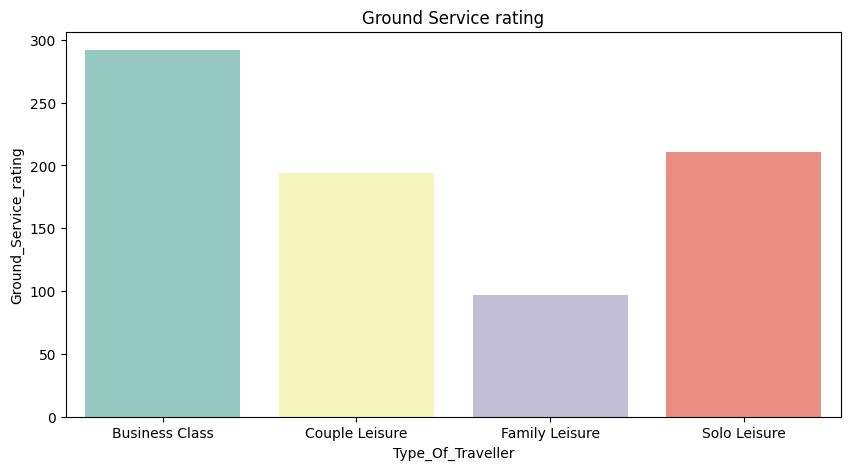

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [252]:
# Display a bar plot of total ground service ratings by type of traveler
display(rating_by_type_of_traveller(groupby_Type_Of_Traveller['Ground_Service_rating'],'Ground_Service_rating','Ground Service rating'))

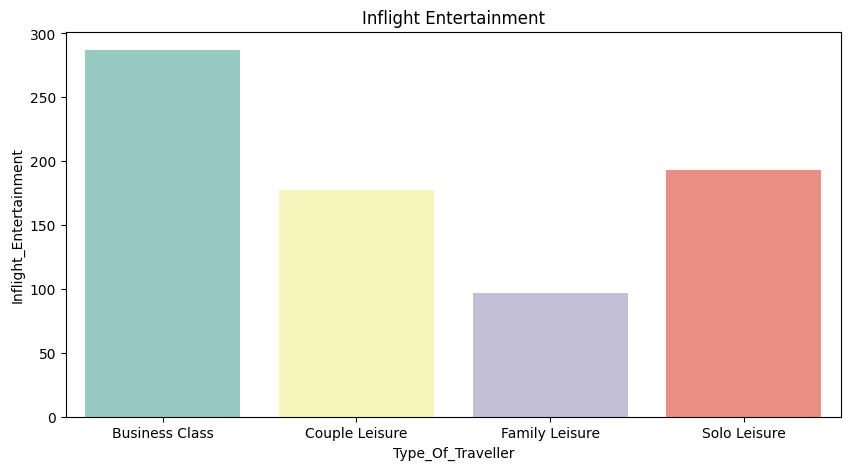

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [253]:
# Display a bar plot of total inflight entertainment ratings by type of traveler
display(rating_by_type_of_traveller(groupby_Type_Of_Traveller['Inflight_Entertainment'],'Inflight_Entertainment','Inflight Entertainment'))

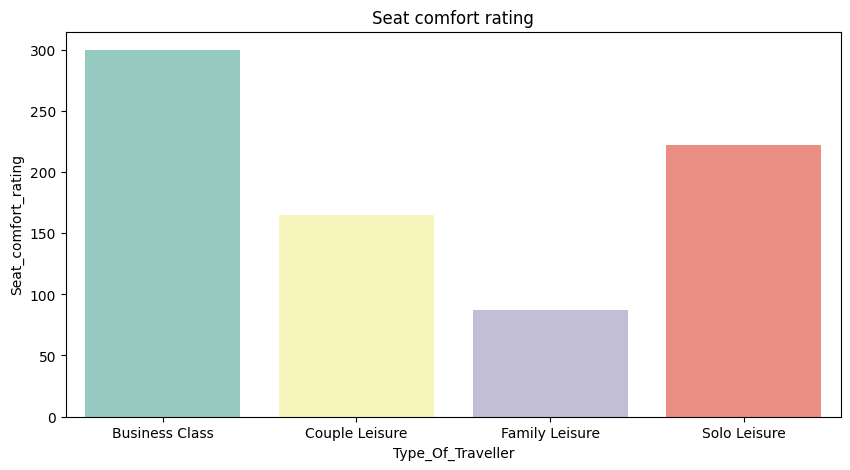

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [254]:
# Display a bar plot of total seat comfort service ratings by type of traveler
display(rating_by_type_of_traveller(groupby_Type_Of_Traveller['Seat_comfort_rating'],'Seat_comfort_rating','Seat comfort rating'))

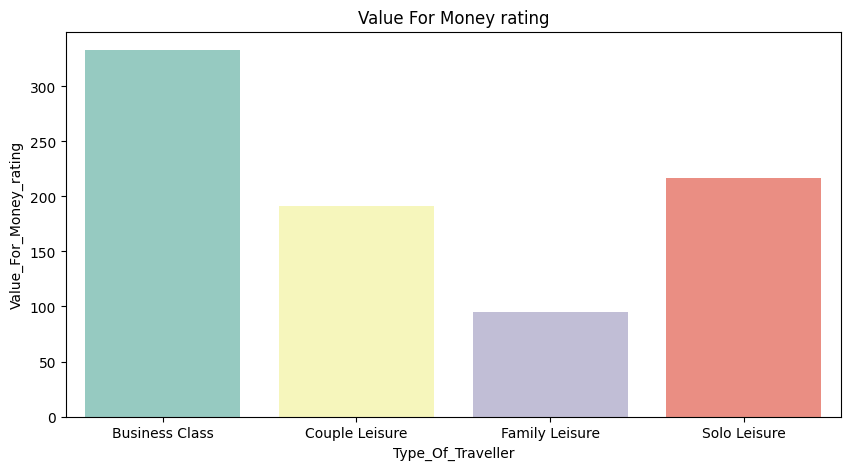

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [255]:
# Display a bar plot of total value for money ratings by type of traveler
display(rating_by_type_of_traveller(groupby_Type_Of_Traveller['Value_For_Money_rating'],'Value_For_Money_rating','Value For Money rating'))

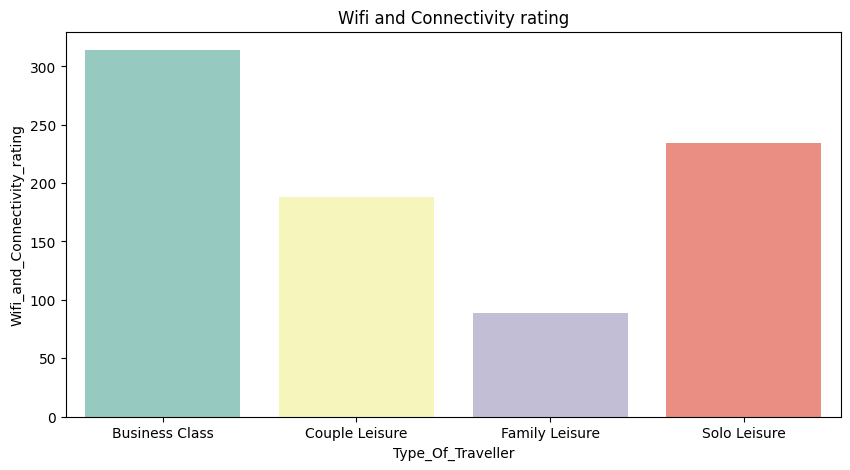

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [256]:
# Display a bar plot of total wifi and connectivity ratings by type of traveler
display(rating_by_type_of_traveller(groupby_Type_Of_Traveller['Wifi_and_Connectivity_rating'],'Wifi_and_Connectivity_rating','Wifi and Connectivity rating'))

From the plots above that as grouped by type of travelers:

*   Business Class travelers seem to have the highest service ratings, indicating that all the services cabin staff and the airlines provides were excellent service to business passengers.
*   Couple Leisure travelers ratings fall in the middle range. It appears that all the services cabin staff and the airlines provides satisfactory service to couples traveling for leisure.

*    The ratings for family leisure travelers are lowest among all traveler types. Perhaps all the services cabin staff and the airlines faces more challenges when dealing with families.
*   Solo Leisure travelers have the almost satisfatory service ratings. It’s possible that solo leisure travelers have specific expectations or preferences that aren’t always met.

In [267]:
# Group the 'British_Airway' DataFrame by 'Seat_Type' and calculate the mean ratings for each rating category
groupby_Seat_Type=British_Airway.groupby('Seat_Type')[['Cabin_Staff_Service_rating',
       'Food_and_Beverages_rating', 'Ground_Service_rating',
       'Inflight_Entertainment', 'Seat_comfort_rating',
       'Value_For_Money_rating', 'Wifi_and_Connectivity_rating']].mean()
groupby_Seat_Type

,Cabin_Staff_Service_rating,Food_and_Beverages_rating,Ground_Service_rating,Inflight_Entertainment,Seat_comfort_rating,Value_For_Money_rating,Wifi_and_Connectivity_rating
Seat_Type,,,,,,,
Business Class,3.091429,2.617143,2.851429,2.928571,2.834286,3.311429,3.148571
Economy Class,3.003683,2.690608,2.701657,2.950276,2.847145,3.139963,2.983425
First Class,3.227273,2.500000,3.500000,2.909091,2.636364,2.954545,2.818182
Premium Economy,3.013333,2.506667,2.760000,3.066667,2.840000,3.213333,3.106667


In [268]:
# Define a function to plot average ratings by seat type using seaborn's barplot
def rating_by_Seat_Type(v,c,title):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=v.index,y=v,palette='Set1')
    #plt.xticks(rotation=90)
    plt.title(f'{title}')
    plt.show()
    return plt

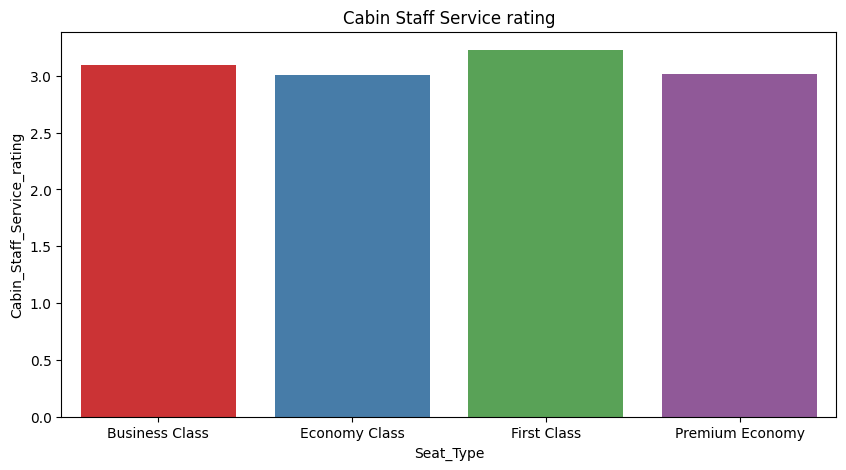

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [259]:
# Display a bar plot of average cabin staff service ratings by seat type
display(rating_by_Seat_Type(groupby_Seat_Type['Cabin_Staff_Service_rating'],'Cabin_Staff_Service_rating','Cabin Staff Service rating'))

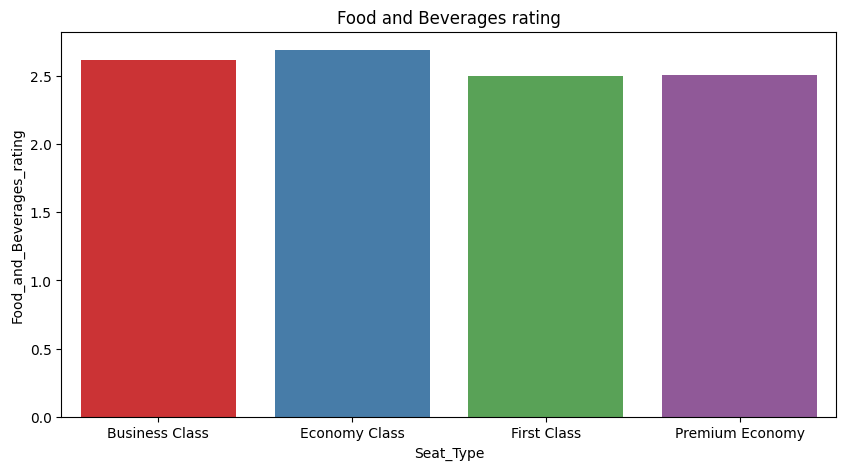

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [260]:
# Display a bar plot of average food and beverages ratings by seat type
display(rating_by_Seat_Type(groupby_Seat_Type['Food_and_Beverages_rating'],'Food_and_Beverages_rating','Food and Beverages rating'))

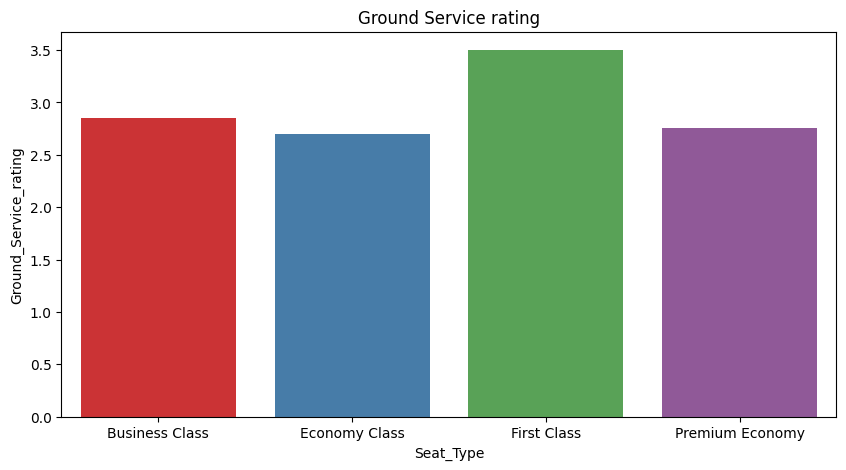

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [261]:
# Display a bar plot of average ground service ratings by seat type
display(rating_by_Seat_Type(groupby_Seat_Type['Ground_Service_rating'],'Ground_Service_rating','Ground Service rating'))

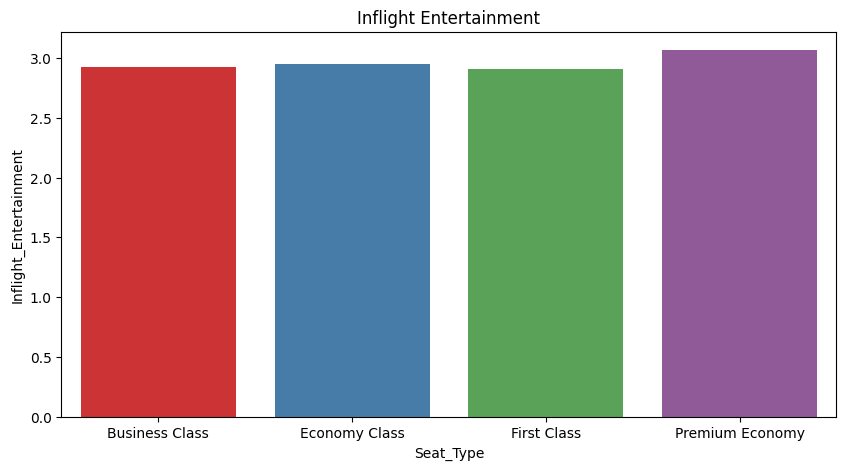

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [262]:
# Display a bar plot of average inflight entertainment ratings by seat type
display(rating_by_Seat_Type(groupby_Seat_Type['Inflight_Entertainment'],'Inflight_Entertainment','Inflight Entertainment'))

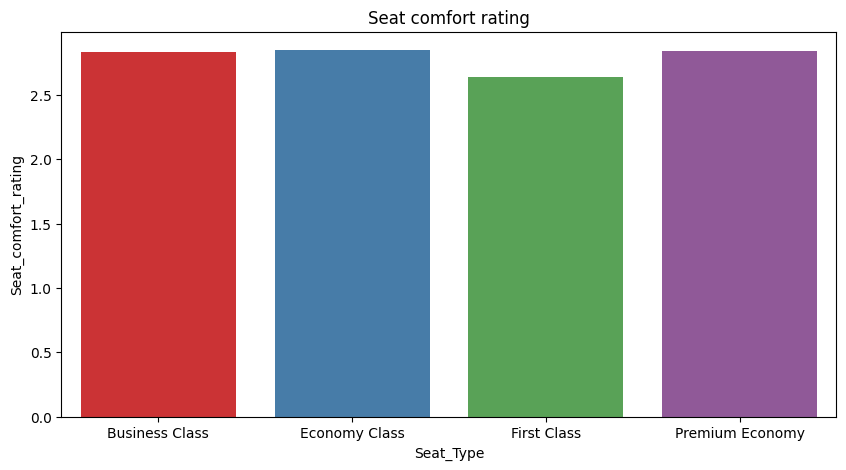

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [263]:
# Display a bar plot of average seat comfort ratings by seat type
display(rating_by_Seat_Type(groupby_Seat_Type['Seat_comfort_rating'],'Seat_comfort_rating','Seat comfort rating'))

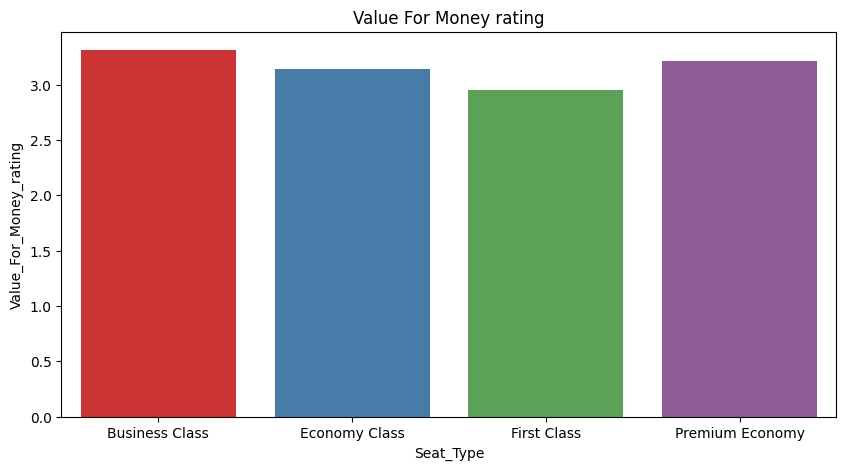

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [264]:
# Display a bar plot of average value for money ratings by seat type
display(rating_by_Seat_Type(groupby_Seat_Type['Value_For_Money_rating'],'Value_For_Money_rating','Value For Money rating'))

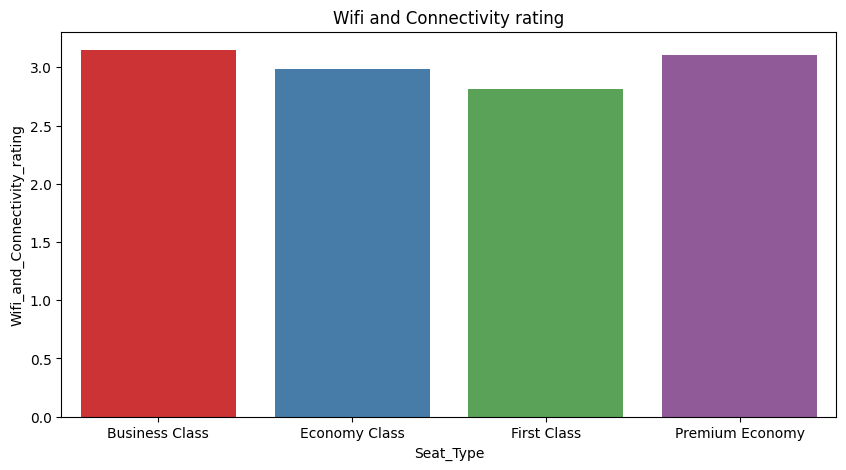

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [265]:
# Display a bar plot of average wifi and connectivity ratings by seat type
display(rating_by_Seat_Type(groupby_Seat_Type['Wifi_and_Connectivity_rating'],'Wifi_and_Connectivity_rating','Wifi and Connectivity rating'))



*  Food and beverages: Interestingly, all seat types have received the same high rating. This suggests that regardless of the seat class, passengers generally have a positive experience with the food and beverage services on these airlines.
*  Cabin Staff Service: All seat classes receive high ratings above 2.5. This suggests that passengers generally have a satisfactory experience with the cabin staff service, regardless of the seat class they choose.

*  Ground Service: First Class has the highest rating, indicating that passengers in this class experience superior ground service,followed by Business Class, Premium Economy, and Economy Class.

*   The bar chart indicates that First Class seats have the highest comfort rating, followed by Business Class, Premium Economy, and Economy Class.
*   From the bar chart, it appears that Business Class has the highest Value for Money rating among different seat types on an airline. Other seat types, such as  Premium Economy and Economy Class, have satisfactory ratings in comparison.
*   Interestingly, Wifi and Connectivity shows that all classes have the same rating(satisfactory).






